In [1]:
import numpy as np        #넘파이 라이브러리 불러오기
import pandas as pd        #판다스 라이브러리 불러오기
import matplotlib as mpl  # 맷플로립 불러오기
import matplotlib.pyplot as plt  # 그래프 그리기 기능 불러오기
import matplotlib.font_manager as fm  # 폰트 매니저 실행
import seaborn as sns     # 씨본 불러오기


fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', name='NanumMyeongjo') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumMyeongjo'}) #폰트설정

# 기후데이터
### DataFrame명 = 'climate'
- 습도 결측값 : 군위지역 5개, 군위 7개년 평균 습도값으로 대체
- 일사량 결측값 : 군위 '2017년 1월 상순 ~ 2018년 11월 중순', 인접지역인 '의성군 봉양면' 일조량으로 대체
- 야간 평균기온 : 군위, 포천 2023년 1 ~ 12월, 2022년 기온으로 대체
   
   ※ 전처리는 엑셀파일에서 처리한 후 pandas로 가져옴
   
   ※ 일조시간 데이터는 전처리 과정에서 시간이 잘못 기재되어 분석에서 제외

### 연도별 데이터

In [2]:
# climate = 기후데이터
file_path = "C:\\Users\\user\\Desktop\\파이썬 프로젝트_사과재배적지 분석\\최종_기후_사과 데이터_결측치처리.xlsx"
df = pd.read_excel(file_path, sheet_name = 0, engine = 'openpyxl')

# 사과 데이터 제외
climate = df.drop(columns=['수확일자', '경도평균', '당도', '산도'])
climate = climate[['지역', '연도', '월', '순별', '강수량', '습도', '일교차', '최고기온', '최저기온', '평균기온', '야간평균기온', '일사량', '일조시간']]
climate

,지역,연도,월,순별,강수량,습도,일교차,최고기온,최저기온,평균기온,야간평균기온,일사량,일조시간
0,군위,2017,1,상순,0.00,80.50,12.50,5.10,-7.40,1.50,-1.4,68.4,6.12
1,군위,2017,1,중순,0.50,63.60,14.20,-1.10,-15.30,-4.10,-6.9,84.8,2.77
2,군위,2017,1,하순,4.50,65.60,19.70,1.80,-17.90,-4.20,-7.1,118.1,10.45
3,군위,2017,2,상순,0.50,59.20,16.10,4.00,-12.10,-0.90,-4.1,113.0,10.98
4,군위,2017,2,중순,14.00,63.40,18.10,6.80,-11.30,0.40,-3.2,139.2,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,포천,2023,11,중순,9.75,71.35,11.70,4.60,-7.10,1.05,5.6,92.8,10.88
500,포천,2023,11,하순,5.50,64.55,20.20,9.90,-10.30,0.95,3.5,79.1,2.07
501,포천,2023,12,상순,4.00,72.25,24.60,12.90,-11.70,3.35,-4.7,68.1,1.18
502,포천,2023,12,중순,47.50,78.65,21.75,5.70,-16.05,-2.25,-9.0,52.5,5.83


# 사과데이터
### DataFrame명 = 'apple'

In [192]:
# 사과 품질 데이터 불러오기
apple = pd.read_excel("C:\\Users\\user\\Desktop\\파이썬 프로젝트_사과재배적지 분석\\과실품질정보_군위_포천.xlsx")

# 산도(%) 이름 변경
apple = apple.rename(columns={'산도(%)' : '산도'})
apple = apple.rename(columns={'경도평균' : '경도'})

# '지역' = 군위, 포천
apple1 = apple.loc[apple['지역']=='군위']
apple2 = apple.loc[apple['지역']=='포천']
apple = pd.concat([apple1, apple2], axis=0)
apple

,지역,연도,수확일자,경도,당도,산도
0,군위,2023,2023-09-04,62.4,14.8,0.22
10,군위,2022,2022-08-30,54.7,13.9,0.27
20,군위,2021,2021-08-26,56.0,13.4,0.22
30,군위,2020,2020-09-02,58.0,14.5,0.23
39,군위,2019,2019-09-06,60.1,14.0,0.23
48,군위,2018,2018-09-05,37.7,15.6,0.23
57,군위,2017,2017-09-06,38.0,15.2,0.19
6,포천,2023,2023-09-20,65.3,14.5,0.19
16,포천,2022,2022-09-07,39.8,14.1,0.21
26,포천,2021,2021-09-09,37.7,14.0,0.21


# 기후+사과데이터
- 원본 데이터(index = 지역, 연도, 월, 순별) : df
- 7~9월 (index = 지역, 연도, 월) : climate_apple_month
     
     - 군위: climate_apple_month_gunwi
     - 포천: climate_apple_month_pocheon
- 연도별 (index = 지역, 연도) : climate_apple_year
     
     - 군위: climate_apple_year_gunwi
     - 포천: climate_apple_year_pocheon

In [171]:
### 7~9월(index = 지역, 연도, 월) : climate_apple_month
# 월별 데이터
climate_apple_month = pd.pivot_table(df,
                               index = ['지역', '연도', '월', '순별'],
                               values = ['강수량', '습도', '일교차', '최고기온', '최저기온', '평균기온', '야간평균기온', '일사량', '일조시간', '경도평균', '당도', '산도'],
                               aggfunc = {'야간평균기온' : 'mean',
                                          '평균기온' : 'mean',
                                          '최고기온' : 'mean',
                                          '최저기온' : 'mean',
                                          '일교차' : 'mean',
                                          '습도' : 'mean',
                                          '강수량' : 'mean',
                                          '일사량' : 'sum',
                                          '일조시간' : 'sum',
                                          '경도평균' : 'mean',
                                          '당도' : 'mean',
                                          '산도' : 'mean'})


# 피봇테이블 to 데이터프레임 / 소수점 2째자리에서 반올림
climate_apple_month = pd.DataFrame(climate_apple_month.to_records()).round(2)

#열 순서 변경(중요한 것 아님)
climate_apple_month = climate_apple_month[['지역', '연도', '월', '강수량', '습도', '일교차', '최고기온', '최저기온', '평균기온', '야간평균기온', '일사량', '일조시간', '경도평균', '당도', '산도']]

# 7, 8, 9월 합치기
climate_apple_month1 = climate_apple_month.loc[climate_apple_month['월']==7]
climate_apple_month2 = climate_apple_month.loc[climate_apple_month['월']==8]
climate_apple_month3 = climate_apple_month.loc[climate_apple_month['월']==9]

climate_apple_month = pd.concat([climate_apple_month1, climate_apple_month2, climate_apple_month3], axis = 0)
# climate_apple_month = pd.concat([climate_apple_month2, climate_apple_month3], axis = 0)

# 정렬 by 지역, 연도, 월
climate_apple_month = climate_apple_month.sort_values(by=['지역', '연도', '월'], ascending=True)
climate_apple_month


# 군위만 보고 싶을 때
climate_apple_month_gunwi = climate_apple_month.loc[climate_apple_month['지역']=='군위']
climate_apple_month_gunwi


# 포천만 보고 싶을 때
climate_apple_month_pocheon = climate_apple_month.loc[climate_apple_month['지역']=='포천']
climate_apple_month_pocheon = climate_apple_month_pocheon.reset_index(drop=False).drop(columns=['index']) # index가 0부터 시작하도록 index 재설정
climate_apple_month_pocheon

,지역,연도,월,일교차
0,포천,2017,7,8.50
1,포천,2017,7,6.70
2,포천,2017,7,7.70
3,포천,2017,8,7.80
4,포천,2017,8,5.70
...,...,...,...,...
58,포천,2023,8,7.90
59,포천,2023,8,8.85
60,포천,2023,9,10.95
61,포천,2023,9,6.15


In [193]:
### 연도별(index = 지역, 연도) : climate_apple_year
climate_apple_year = pd.pivot_table(df,
                                    index = ['지역', '연도'],
                                    values = ['강수량', '습도', '일교차', '최고기온', '최저기온', '평균기온', '야간평균기온', '일사량', '일조시간', '경도평균', '당도', '산도'],
                                    aggfunc = {'야간평균기온' : 'mean',
                                               '평균기온' : 'mean',
                                               '최고기온' : 'mean',
                                               '최저기온' : 'mean',
                                               '일교차' : 'mean',
                                               '습도' : 'mean',
                                               '강수량' : 'mean',
                                               '일사량' : 'sum',
                                               '일조시간' : 'sum',
                                               '경도평균' : 'mean',
                                               '당도' : 'mean',
                                               '산도' : 'mean'})
climate_apple_year

# 피봇테이블 to 데이터프레임 / 소수점 2째자리에서 반올림
climate_apple_year = pd.DataFrame(climate_apple_year.to_records()).round(2)

#열 순서 변경(중요한 것 아님)
climate_apple_year = climate_apple_year[['지역', '연도', '강수량', '습도', '일교차', '최고기온', '최저기온', '평균기온', '야간평균기온', '일사량', '일조시간', '경도평균', '당도', '산도']]
climate_apple_year

# 군위만 보고 싶을 때
climate_apple_year_gunwi = climate_apple_year.loc[climate_apple_year['지역']=='군위']
climate_apple_year_gunwi

# 포천만 보고 싶을 때
climate_apple_year_pocheon = climate_apple_year.loc[climate_apple_year['지역']=='포천'].reset_index(drop=False)
climate_apple_year_pocheon = climate_apple_year_pocheon.drop(columns=['index'])
climate_apple_year_pocheon 

,지역,연도,강수량,습도,일교차,최고기온,최저기온,평균기온,야간평균기온,일사량,일조시간,경도평균,당도,산도
0,군위,2017,16.68,71.24,13.71,15.02,1.32,11.84,8.34,5206.20,234.57,38.0,15.2,0.19
1,군위,2018,35.04,73.94,14.82,15.88,1.06,11.72,8.24,5095.30,222.02,37.7,15.6,0.23
2,군위,2019,27.01,73.46,13.92,15.54,1.62,12.26,8.91,5216.10,210.94,60.1,14.0,0.23
3,군위,2020,36.67,70.98,13.96,15.59,1.64,12.18,9.21,5235.30,238.25,58.0,14.5,0.23
4,군위,2021,31.59,70.51,12.73,15.40,2.67,12.27,9.38,5181.40,228.29,56.0,13.4,0.22
5,군위,2022,19.53,65.82,14.35,15.77,1.42,12.05,8.96,5542.60,233.74,54.7,13.9,0.27
6,군위,2023,52.17,70.78,13.82,16.36,2.54,12.80,8.96,5339.80,264.64,62.4,14.8,0.22
7,포천,2017,29.56,76.99,13.17,14.09,0.92,10.86,7.70,5035.60,234.74,37.6,13.2,0.21
8,포천,2018,37.36,77.10,14.52,14.93,0.41,10.83,7.79,5139.90,243.48,36.2,13.3,0.22
9,포천,2019,22.94,74.07,13.96,15.02,1.06,11.43,8.36,4946.70,260.57,40.9,13.0,0.32


# 시각화
## 상관관계 (heatmap)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


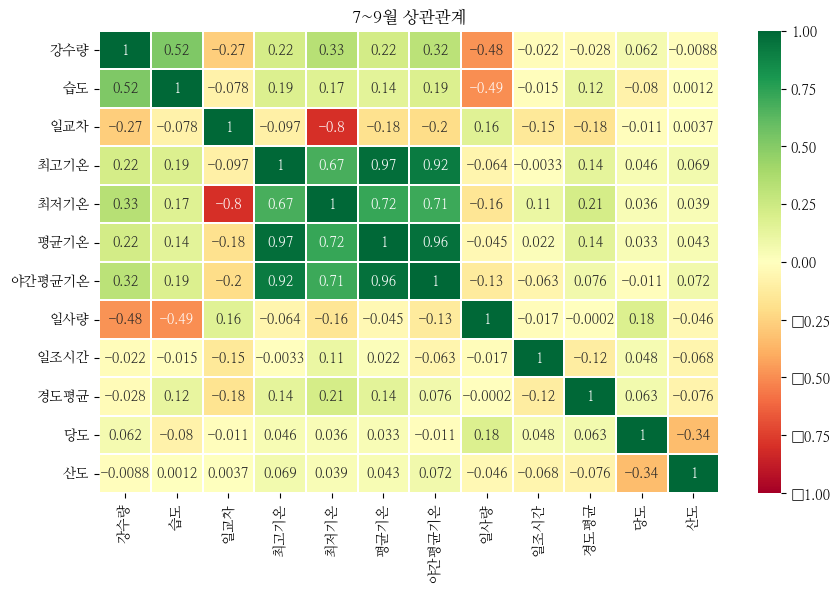

In [7]:
### 7~9월 지역통합 기후데이터 - 사과 상관관계
# climate_apple_month
climate_apple_month = climate_apple_month.drop(columns=['지역', '연도', '월'])

plt.figure(figsize=(10, 6))
plt.title('7~9월 상관관계')
sns.heatmap(climate_apple_month.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


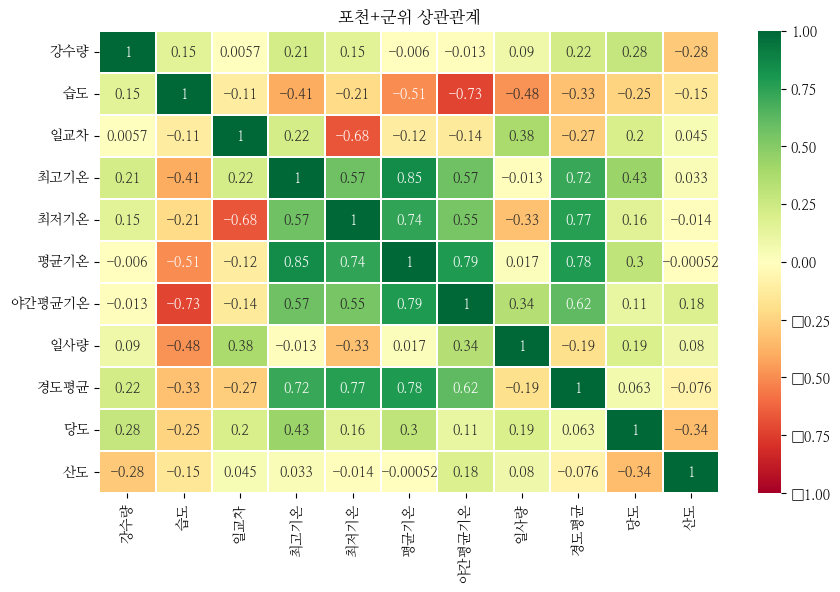

In [288]:
### 연도별 기후 - 사과 상관관계
### 지역 통합 == 유의미한 상관관계성 확인 어려움
# climate_apple_year
year = climate_apple_year.drop(columns=['지역', '연도', '일조시간'])
plt.figure(figsize=(10,6))
plt.title('포천+군위 상관관계')
sns.heatmap(year.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True, annot_kws={"size": 10})
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


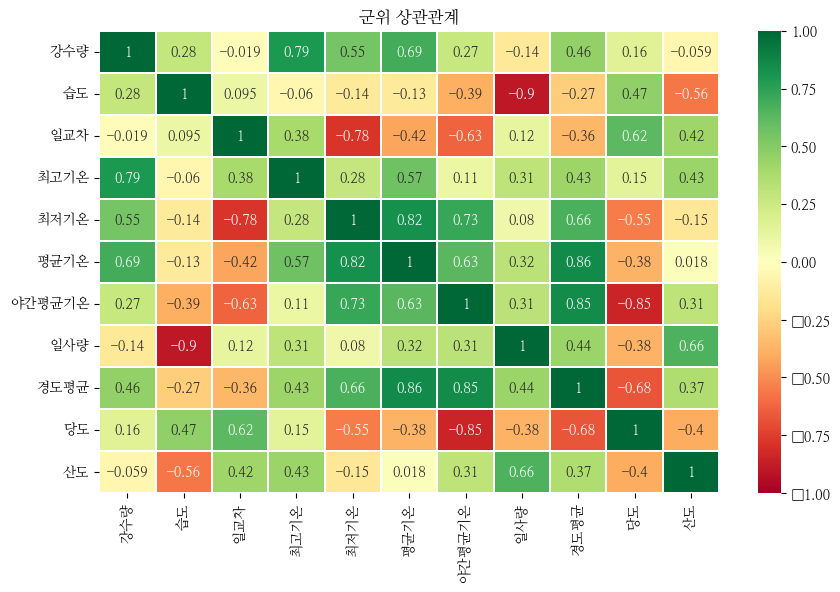

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


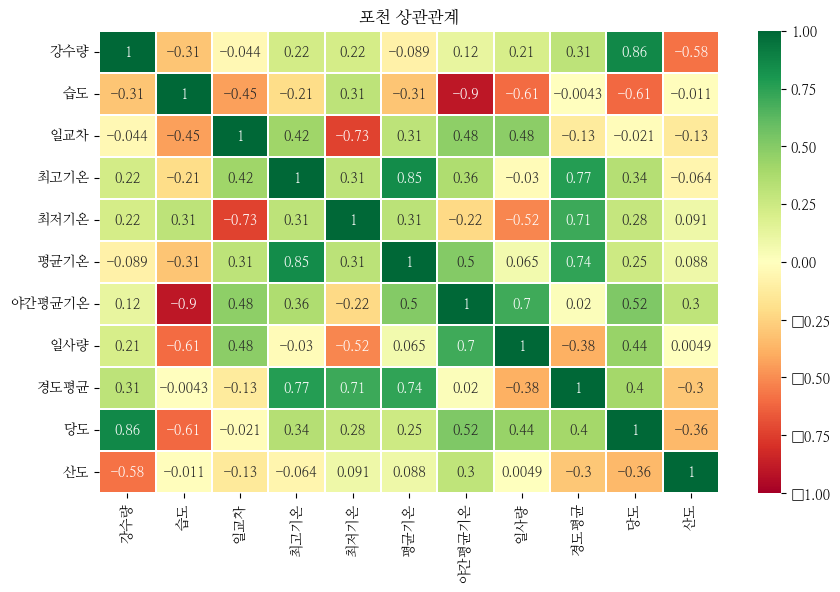

In [284]:
### 군위 연도별 기후-사과 상관관계
plt.figure(figsize=(10,6))
year_gunwi = climate_apple_year_gunwi.drop(columns=['지역', '연도', '일조시간'])
plt.title('군위 상관관계')
sns.heatmap(year_gunwi.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()


### 포천 연도별 기후-사과 상관관계
plt.figure(figsize=(10,6))
year_pocheon = climate_apple_year_pocheon.drop(columns=['지역', '연도', '일조시간'])
plt.title('포천 상관관계')
sns.heatmap(year_pocheon.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()

## 상관관계 Heatmap에 따른 '군위 지역' 개별 변수 확인
- 위의 연도별 히트맵을 통해 상관관계가 높게 나타난 변수들을 지역별로 3-4가지 선정하여 시각화
- 군위 데이터프레임 : climate_apple_year_gunwi
- 포천 데이터프레임 : climate_apple_year_pocheon
- 시각화 쿼리 기본 구조는 동일하고 x축, y축 지정에서 column명 변경하면서 필요한 차트 추출

In [1]:
### 아래 쿼리에서 모두 '경도'로 작성하여 해당 쿼리 반드시 실행 필요
# 경도 column명 변경: '경도평균' > '경도'
climate_apple_year_gunwi = climate_apple_year_gunwi.rename(columns = {'경도평균' : '경도'})
climate_apple_year_pocheon = climate_apple_year_pocheon.rename(columns = {'경도평균' : '경도'})

NameError: name 'climate_apple_year_gunwi' is not defined

### 1) 경도/당도 - 야간평균기온

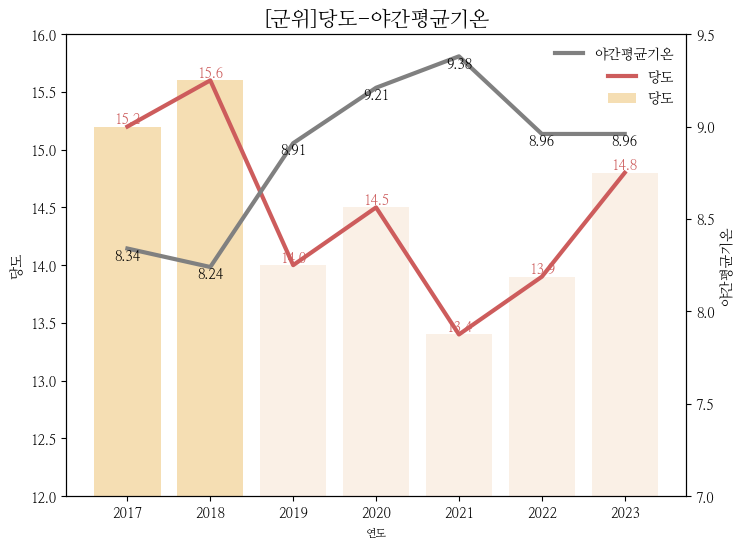

In [186]:
###### 당도-야간평균기온 상관관계######


# x, y축 지정
x = climate_apple_year_gunwi['연도']
y1 = climate_apple_year_gunwi['야간평균기온'] # [] 안의 값 변경하여 다른 column 값 그래프 생성
y2 = climate_apple_year_gunwi['당도'] # [] 안의 값 변경하여 다른 column 값 그래프 생성

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('[군위]당도-야간평균기온', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('당도') # y축 label명
plt.bar(x, y2, label='당도', color=['wheat' if val > 15 else 'linen' for val in y2], linewidth = 3) # 막대그래프별 색깔 구분하기
# bar_color = ['indianred' if val > 15 else 'lightcoral' for val in y2]  # 당도가 14 이상인 경우는 indianred, 그 외는 lightcoral
plt.plot(x, y2, label='당도', color='indianred', linewidth = 3) # 막대 그래프
plt.tick_params(axis='y')
plt.ylim(12, 16) # y축 범위 설정
plt.legend(loc='best', bbox_to_anchor=(1, 0.95), fontsize=10, frameon=False) # 범례

# 레이블 수치값 붙이기
for i, txt in enumerate(y2):
    plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='bottom', color='indianred')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('야간평균기온')  # y축 label명
plt.plot(x, y1, label='야간평균기온', color='gray', linewidth = 3) # 꺾은선 그래프, 선굵기(linewidth)
plt.tick_params(axis='y')
plt.ylim(7, 9.5) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
for i, txt in enumerate(y1):
    plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='top')

plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=10, frameon=False) # 범례
plt.show()

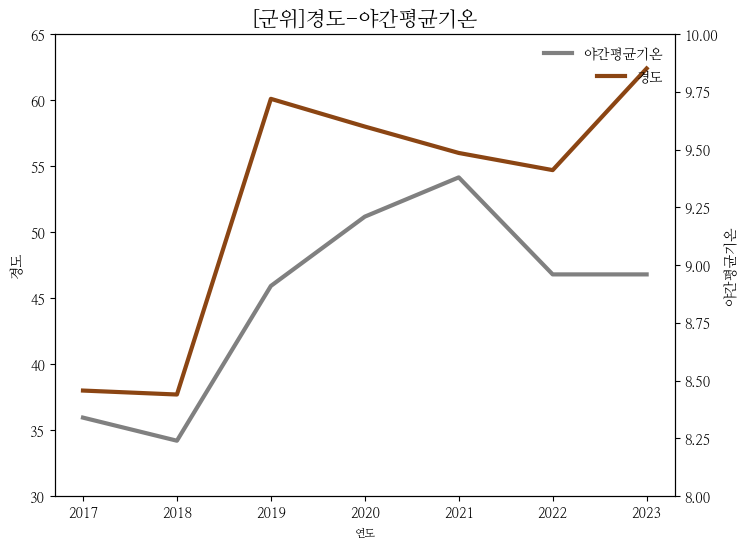

In [12]:
###### 경도-야간평균기온 상관관계######


# x, y축 지정
x = climate_apple_year_gunwi['연도']
y1 = climate_apple_year_gunwi['야간평균기온']
y2 = climate_apple_year_gunwi['경도']

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('[군위]경도-야간평균기온', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('경도') # y축 label명
plt.plot(x, y2, label='경도', color='saddlebrown', linewidth = 3) # 막대 그래프
plt.tick_params(axis='y')
plt.ylim(30, 65) # y축 범위 설정
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, frameon=False) # 범례

# 레이블 수치값 붙이기
# for i, txt in enumerate(y2):
#     plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='bottom', color='indianred')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('야간평균기온')  # y축 label명
plt.plot(x, y1, label='야간평균기온', color='gray', linewidth = 3) # 꺾은선 그래프, 선굵기(linewidth)
plt.tick_params(axis='y')
plt.ylim(8, 10) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
# for i, txt in enumerate(y1):
#     plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='bottom')
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=10, frameon=False) # 범례
plt.show()

### 2) 경도/당도 - 평균기온 상관관계

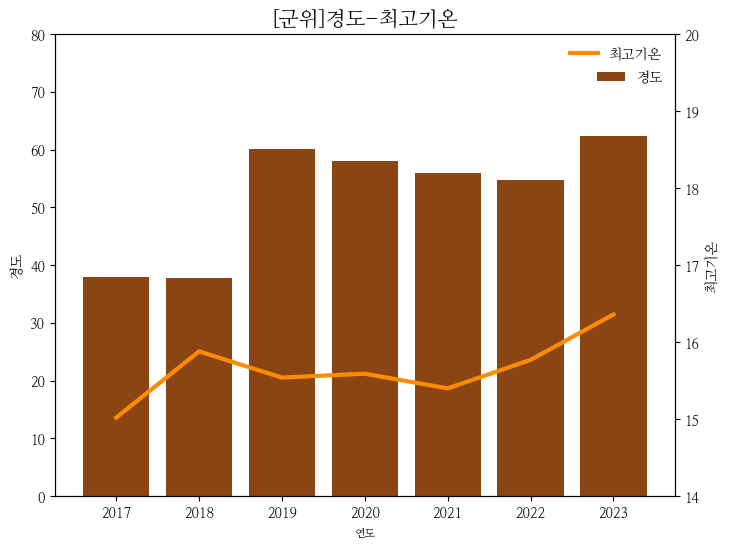

In [281]:
###### 경도-최고기온 상관관계######


# x, y축 지정
x = climate_apple_year_gunwi['연도']
y1 = climate_apple_year_gunwi['최고기온'] 
y2 = climate_apple_year_gunwi['경도'] 

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('[군위]경도-최고기온', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('경도') # y축 label명
plt.bar(x, y2, label='경도', color='saddlebrown') # 막대 그래프
plt.tick_params(axis='y')
plt.ylim(0, 80) # y축 범위 설정
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, frameon=False) # 범례

# 레이블 수치값 붙이기
# for i, txt in enumerate(y2):
#     plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='top', color='white')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('최고기온')  # y축 label명
plt.plot(x, y1, label='최고기온', color='darkorange', linewidth = 3) # 꺾은선 그래프, 선굵기(linewidth)
plt.tick_params(axis='y')
plt.ylim(14, 20) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
# for i, txt in enumerate(y1):
#     plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='bottom', color='darkorange')

plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=10, frameon=False) # 범례
plt.show()

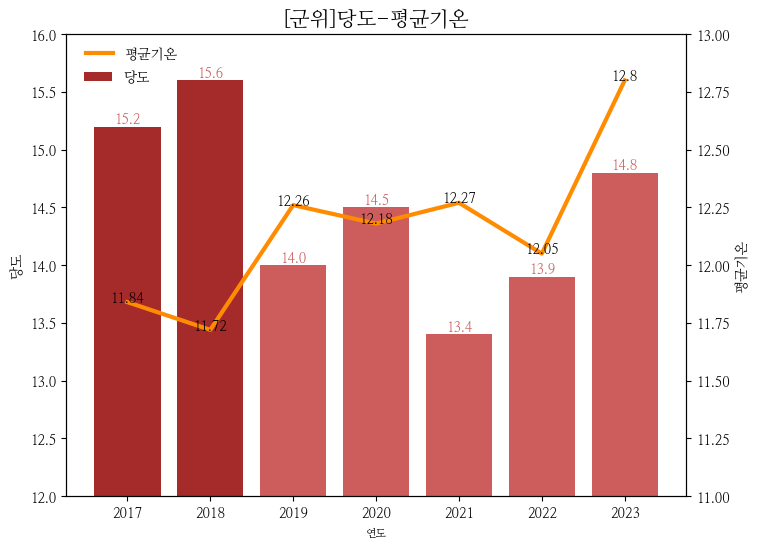

In [190]:
###### 군위 당도-평균기온 상관관계######


# x, y축 지정
x = climate_apple_year_gunwi['연도']
y1 = climate_apple_year_gunwi['평균기온']
y2 = climate_apple_year_gunwi['당도']

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('[군위]당도-평균기온', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('당도') # y축 label명
plt.bar(x, y2, label='당도', color=['brown' if val > 15 else 'indianred' for val in y2], linewidth = 3) # 막대 그래프
plt.tick_params(axis='y')
plt.ylim(12, 16) # y축 범위 설정
plt.legend(loc='upper right', bbox_to_anchor=(0.155, 0.95), fontsize=10, frameon=False)

# 레이블 수치값 붙이기
for i, txt in enumerate(y2):
    plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='bottom', color='indianred')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('평균기온')  # y축 label명
plt.plot(x, y1, label='평균기온', color='darkorange', linewidth = 3) # 꺾은선 그래프, 선굵기(linewidth)
plt.tick_params(axis='y')
plt.ylim(11, 13) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
for i, txt in enumerate(y1):
    plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='baseline')

plt.legend(loc='best', bbox_to_anchor=(0.2, 1), fontsize=10, frameon=False)
plt.show()

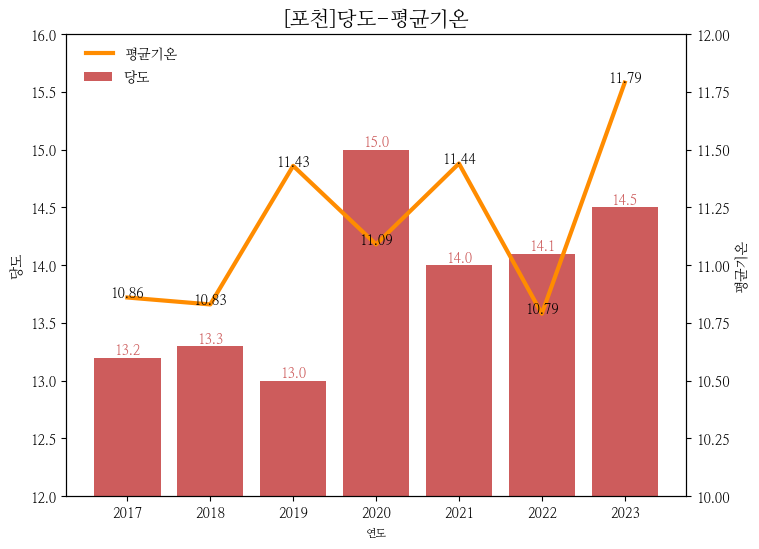

In [98]:
###### 포천 당도-평균기온 상관관계######


# x, y축 지정
x = climate_apple_year_pocheon['연도']
y1 = climate_apple_year_pocheon['평균기온']
y2 = climate_apple_year_pocheon['당도']

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('[포천]당도-평균기온', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('당도') # y축 label명
plt.bar(x, y2, label='당도', color='indianred') # 막대 그래프
plt.tick_params(axis='y')
plt.ylim(12, 16) # y축 범위 설정
plt.legend(loc='upper right', bbox_to_anchor=(0.155, 0.95), fontsize=10, frameon=False)

# 레이블 수치값 붙이기
for i, txt in enumerate(y2):
    plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='bottom', color='indianred')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('평균기온')  # y축 label명
plt.plot(x, y1, label='평균기온', color='darkorange', linewidth = 3) # 꺾은선 그래프, 선굵기(linewidth)
plt.tick_params(axis='y')
plt.ylim(10, 12) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
for i, txt in enumerate(y1):
    plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='baseline')

plt.legend(loc='best', bbox_to_anchor=(0.2, 1), fontsize=10, frameon=False)
plt.show()

### 3) 산도-일사량 상관관계

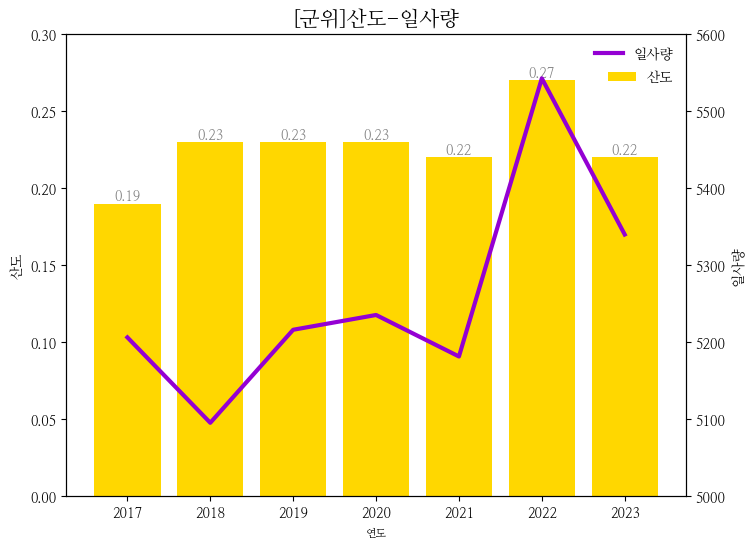

In [137]:
###### 산도-일사량 상관관계######


# x, y축 지정
x = climate_apple_year_gunwi['연도']
y1 = climate_apple_year_gunwi['일사량']
y2 = climate_apple_year_gunwi['산도']

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('[군위]산도-일사량', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('산도') # y축 label명
plt.bar(x, y2, label='산도', color='gold') # 막대 그래프
plt.tick_params(axis='y')
plt.ylim(0, 0.3) # y축 범위 설정
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, frameon=False)

# 레이블 수치값 붙이기
for i, txt in enumerate(y2):
    plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='bottom', color='gray')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('일사량')  # y축 label명
plt.plot(x, y1, label='일사량', color='darkviolet', linewidth = 3) # 꺾은선 그래프, 선굵기(linewidth)
plt.tick_params(axis='y')
plt.ylim(5000, 5600) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
# for i, txt in enumerate(y1):
#     plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='bottom')

plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)
plt.show()

### 4) 당도-일교차 상관관계

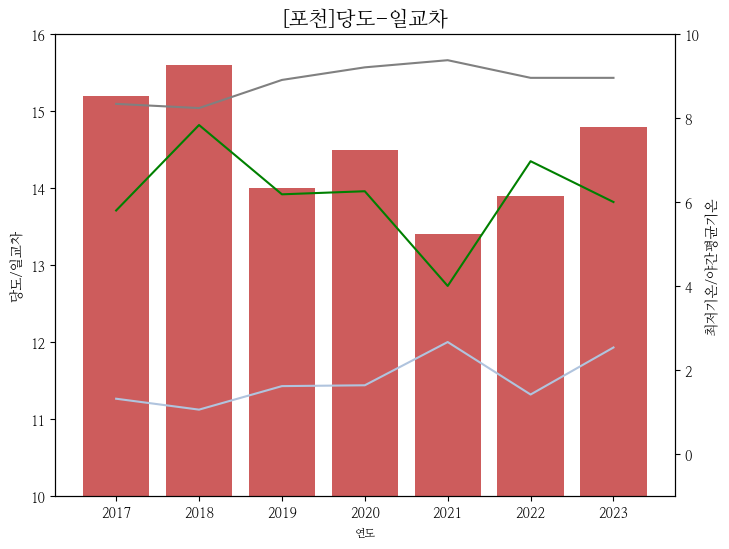

In [248]:
###### 당도-일교차 상관관계######


# x, y축 지정
x = climate_apple_year_gunwi['연도']
y1 = climate_apple_year_gunwi['일교차']
y2 = climate_apple_year_gunwi['당도']
y3 = climate_apple_year_gunwi['최저기온']
y4 = climate_apple_year_gunwi['야간평균기온']

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('[포천]당도-일교차', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('당도/일교차') # y축 label명
plt.bar(x, y2, label='당도', color='indianred') # 막대 그래프
plt.plot(x, y1, label='일교차', color='green')
plt.tick_params(axis='y')
plt.ylim(10, 16) # y축 범위 설정
# plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, frameon=False)

# 레이블 수치값 붙이기
# for i, txt in enumerate(y2):
#     plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='bottom', color='indianred')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('최저기온/야간평균기온')  # y축 label명
plt.plot(x, y3, label='최저기온', color='lightsteelblue') # 꺾은선 그래프, 선굵기(linewidth)
plt.plot(x, y4, label='야간평균기온', color='gray')
plt.tick_params(axis='y')
plt.ylim(-1, 10) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
# for i, txt in enumerate(y1):
#     plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='top')

# plt.legend(loc='best', bbox_to_anchor=(1, 0.95), fontsize=10, frameon=False)
plt.show()

# 사과 맛데이터 시각화

### 1) 군위, 포천 사과 당도 비교 그래프

IndexError: index -1 is out of bounds for axis 0 with size 0

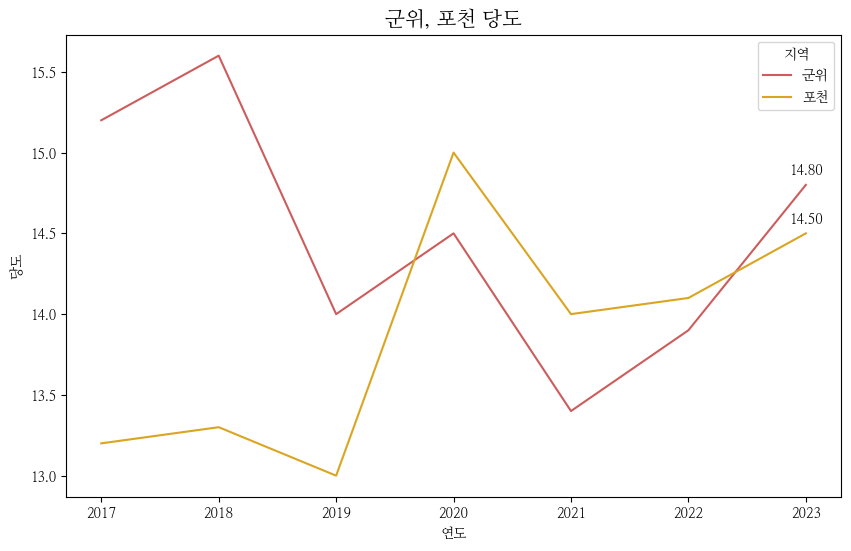

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터 생성
x = climate_apple_year['연도']
y1 = climate_apple_year_gunwi['당도']
y2 = climate_apple_year_pocheon['당도']

# 데이터프레임 생성
data = pd.DataFrame({'연도': x, '군위': y1, '포천': y2})

# 데이터프레임을 재구성하여 '연도', '값', '지역' 열을 생성
melted_data = pd.melt(data, id_vars=['연도'], value_vars=['군위', '포천'], var_name='지역', value_name='당도')

# 그래프 만들기
plt.figure(figsize=(10, 6)) # 그래프 사이즈
plt.title('군위, 포천 당도', fontsize=15) # 제목

# Seaborn을 사용하여 꺾은선 그래프 그리기
ax = sns.lineplot(x='연도', y='당도', hue='지역', data=melted_data, palette=['indianred', 'goldenrod'])

# 레이블 추가
for line in ax.lines:
    x_data, y_data = line.get_xydata().T
    ax.annotate(f'{y_data[-1]:.2f}', (x_data[-1], y_data[-1]), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black')

# y축 범위 설정
plt.ylim(0, 30)

# 레이블과 범례 추가
plt.xlabel('연도', fontsize=8) # x축 label명
plt.ylabel('기온') # y축 label명
plt.legend(title='지역', loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

# 그래프 표시
plt.show()


### 2) 군위, 포천 사과 경도 비교 그래프

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

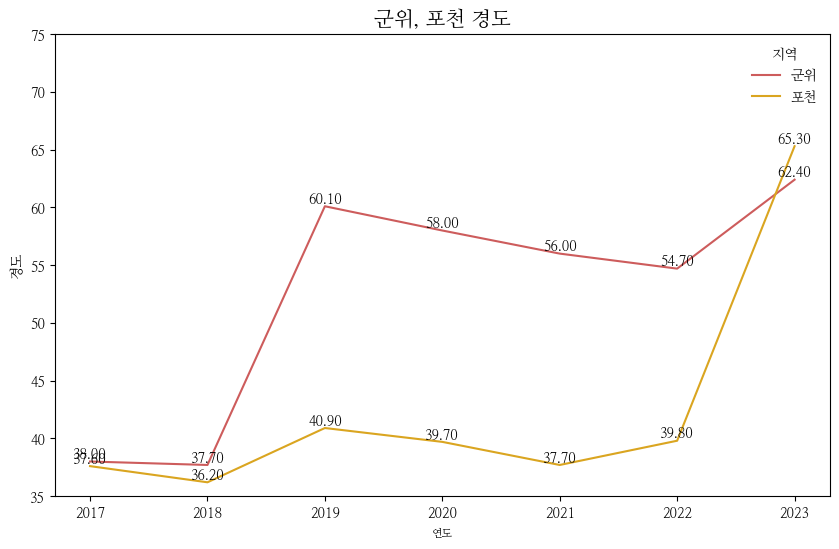

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 예시 데이터 생성
x = climate_apple_year['연도']
y1 = climate_apple_year_gunwi['경도']
y2 = climate_apple_year_pocheon['경도']

# 데이터프레임 생성
data = pd.DataFrame({'연도': x, '군위': y1, '포천': y2})

# 데이터프레임을 재구성하여 '연도', '값', '지역' 열을 생성
melted_data = pd.melt(data, id_vars=['연도'], value_vars=['군위', '포천'], var_name='지역', value_name='경도')

# 그래프 만들기
plt.figure(figsize=(10, 6)) # 그래프 사이즈
plt.title('군위, 포천 경도', fontsize=15) # 제목

# Seaborn을 사용하여 꺾은선 그래프 그리기
ax = sns.lineplot(x='연도', y='경도', hue='지역', data=melted_data, palette=['indianred', 'goldenrod'])

# 레이블 추가
for i, txt in enumerate(melted_data['경도']):
    plt.text(melted_data['연도'][i], txt, f'{txt:.2f}', ha='center', va='bottom', color='black')

# y축 범위 설정
plt.ylim(35, 75)

# 레이블과 범례 추가
plt.xlabel('연도', fontsize=8) # x축 label명
plt.ylabel('경도') # y축 label명
plt.legend(title='지역', loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

# 그래프 표시
plt.show()


### 3) 군위 사과 당도/경도/산도 그래프

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


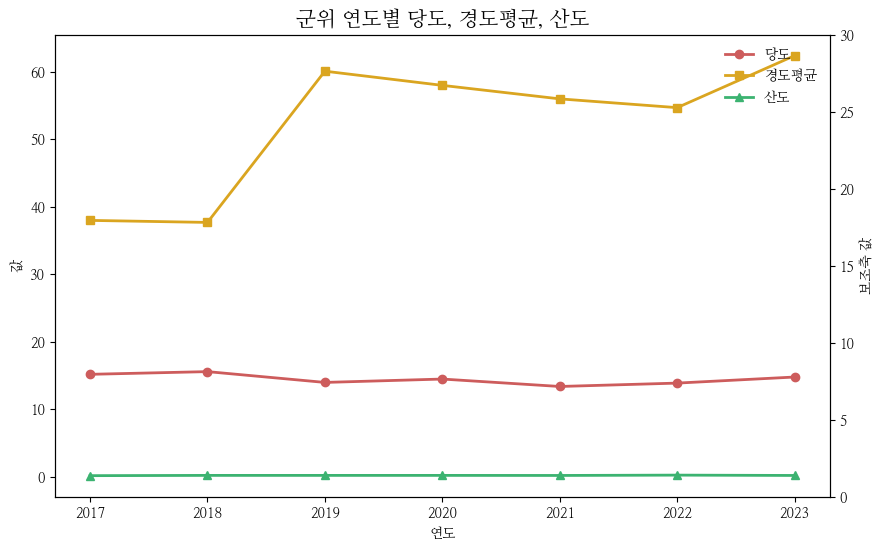

In [225]:
import matplotlib.pyplot as plt

# 데이터 설정
x = climate_apple_year_gunwi['연도']  # '연도' 변수 크기를 수정함
y1 = climate_apple_year_gunwi['당도']
y2 = climate_apple_year_gunwi['경도']
y3 = climate_apple_year_gunwi['산도']

# 그래프 만들기
plt.figure(figsize=(10, 6)) # 그래프 사이즈 설정
plt.title('군위 연도별 당도, 경도평균, 산도', fontsize=15) # 제목 설정

# 꺾은선 그래프 그리기
plt.plot(x, y1, label='당도', marker='o', color='indianred', linewidth=2)
plt.plot(x, y2, label='경도평균', marker='s', color='goldenrod', linewidth=2)
plt.plot(x, y3, label='산도', marker='^', color='mediumseagreen', linewidth=2)

# 레이블 및 범례 추가
plt.xlabel('연도', fontsize=10)
plt.ylabel('값', fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

# 보조축 추가
plt.twinx()  # 보조축 설정
plt.ylabel('보조축 값', fontsize=10)  # 보조축 레이블
# 보조축에 대한 꺾은선 그래프 추가
# plt.plot(x, [val * 2 for val in y1], label='보조축 데이터', linestyle='dashed', color='blue', linewidth=2)

# 보조축 범위 설정 (예시로 0에서 30까지로 설정)
plt.ylim(0, 30)

# 보조축 레이블과 범례 추가
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9), fontsize=10, frameon=False)

# 그래프 표시
plt.show()


### 4) 포천 사과 당도/경도/산도 그래프

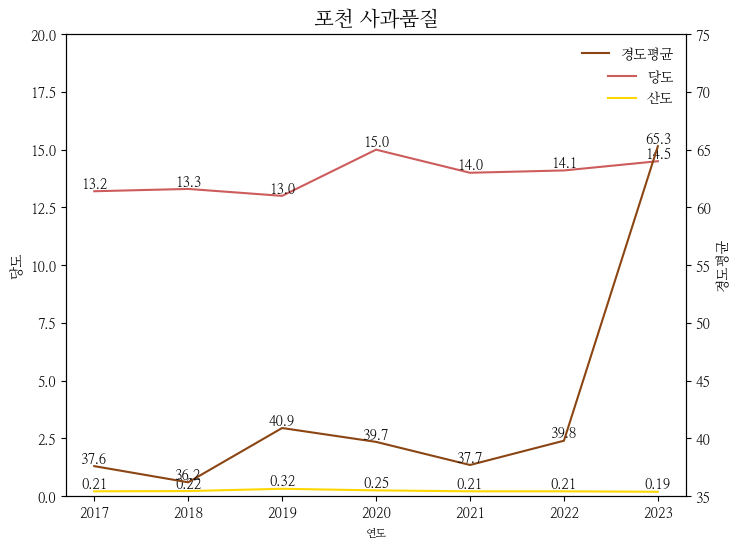

In [244]:
# x, y축 지정
x = climate_apple_year_pocheon['연도']  # '연도' 변수 크기를 수정함
y1 = climate_apple_year_pocheon['경도']
y2 = climate_apple_year_pocheon['당도']
y3 = climate_apple_year_pocheon['산도']

# 그래프 만들기
plt.figure(figsize=(8, 6)) # 그래프 사이즈
plt.title('포천 사과품질', fontsize=15) # 제목
plt.xlabel('연도', fontsize=8) # x축 label명


## 그래프1) y축(왼쪽)을 설정
plt.ylabel('당도') # y축 label명
plt.plot(x, y2, label='당도', color='indianred')
plt.plot(x, y3, label='산도', color='gold')
plt.tick_params(axis='y')
plt.ylim(0, 20) # y축 범위 설정
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=10, frameon=False)

# 레이블 수치값 붙이기
for i, txt in enumerate(y2):
    plt.text(x[i], y2[i], f'{y2[i]}',ha='center', va='bottom')
for i, txt in enumerate(y3):
    plt.text(x[i], y3[i], f'{y3[i]}',ha='center', va='bottom')



## 그래프2) 보조 y축(오른쪽)을 설정
# 뒤에 만드는 그래프가 앞으로 나오게 됨
plt.twinx() # 보조축 설정
plt.ylabel('경도평균')  # y축 label명
plt.plot(x, y1, label='경도평균', color='saddlebrown') # 꺾은선 그래프, 선굵기(linewidth)
plt.tick_params(axis='y')
plt.ylim(35, 75) # 보조 y축 범위 설정

# 레이블 수치값 붙이기
for i, txt in enumerate(y1):
    plt.text(x[i], y1[i], f'{y1[i]}', ha='center', va='bottom')

plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)
plt.show()